# Практическая работа 1

## Цель работы

Провести анализ выбранного датасета и выявить интересные и возможные зависимости/закономерности в данных.

## Задачи

1. Провести исследование выбранного датасета.
2. Использовать полученные знания для статистического анализа данных.

## Описание датасета

В нашем распоряжении данные, взятые с kaggle.com — зарплаты за период 2020-2022 г.г. в сфере Data Science. В датасете выделены 11 стобцов:
- work_year - год выплаты зарплаты;
- experience_level - уровень опыта работы в течение года, где EN- Начальный уровень / MI- Мидл / SE- Сеньёр / EX- Профи;
- employment_type - Тип занятости на роль, где: PT- Неполный рабочий день / FT- Полный рабочий день / CT- Контракт / FL- Фриланс;
- job_title	- Точное название роли;
- salary - Величина зарплаты (евро или доллар);
- salary_currency - Валюта выплачиваемой заработной платы;
- salaryinusd - Заработная плата в долларах США (курс валюты, разделенный на средний курс доллара США за соответствующий год через fxdata.foorilla.com);
- employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
- remote_ratio - Общий объем удаленной работы, где: 0- Нет удаленной работы (или менее 20%), 50- Частично удаленная работа, 100- Полностью удаленная работа (или более 80%);
- company_location - Страна главного офиса или филиала работодателя тоже в виде кода страны ISO 3166;
- company_size - Среднее количество людей, работавших в компании в течение года: S- менее 50 сотрудников, M- от 50 до 250 сотрудников, L- более 250 сотрудников.

## Изучение данных из файла

In [148]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [149]:
# Чтение нашего датасета с корневой папки, где находится и исполняемый файл
data = pd.read_csv('ds_salaries.csv')
# Смотрим первые 11 строк
data.head(11)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [150]:
# смотрим размерность датасета
data.shape

(607, 12)

Датасет отобразился корректно. У нас 607 значений и 11 колонок, как и было первоначально заявлено + 1 колонка, дублирующая индексы. Удалим эту дублирующую колонку, а также изучим датасет чуть детальнее.

In [151]:
# Удаление лишней колонки
del data['Unnamed: 0']
# data.head(11)

In [152]:
# Смотрим общие характеристики по нашему датасету
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


Судя по всему, нам повезло, пропусков нет. Все типы данных для каждой колонки определены верно. Т.е. там, где мы предполагаем увидеть целое число- у нас тип данных целого числа(int64), а где строковое значение - там тип object. И на всякий случай, убедимся в отсутствии пропусков по каждой категории, применив метод, определяющий наличие пропуска "isna()" и просуммируем методом "sum()". Каждый пропуск дает значение единицы, просуммировав все единицы, мы можем получить количество пропусков в каждом столбце.

In [153]:
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Все верно, пропусков нет.

Итак, думать, что делать с пропусками нам не придется, ввиду их отсутствия. Все типы данных заявлены верно, и наш датасет не требует добавления и/или изменения значения или типа значения какого-либо столбца. Но не исключено, что нам это потребуется при более конкретном исследовании гипотез.

## Исследование 1

### Выявляем самые популярные роли в сфере Data Science

В первую очередь необходимо посмотреть есть ли у нас какие-то фавориты в ролях из сферы Data Science.

Используем встроенный метод для получения датасета по заданной колонке с подсчетом всех уникальных значений в ней и повторений по убыванию. Другими словами, получаем частотную таблицу.

In [154]:
data['job_title'].value_counts().head(7)

Data Scientist               143
Data Engineer                132
Data Analyst                  97
Machine Learning Engineer     41
Research Scientist            16
Data Science Manager          12
Data Architect                11
Name: job_title, dtype: int64

Было получено 50 различных значений и выявлены явные лидеры, такие как: Data Scientist, Data Engineer и Data Analyst, Machine Learning Engineer, Research Scientist  и так далее. Остальные роли достаточно редки и уникальны.

Рассмотрим только первые 3-4 роли. Для этого создадим отдельную таблицу data_top4, куда включим только строки, где job_title равен одной из ролей из нашего "ТОП-4".

In [155]:
data_top4 = data[(data['job_title'] == 'Data Scientist') |
                 (data['job_title'] == 'Data Engineer') |
                (data['job_title'] == 'Data Analyst') |
                (data['job_title'] == 'Machine Learning Engineer')]

Посмотрим на диаграмму размаха для того, чтобы узнать все ли значения входят в доверительный интервал. Или все же есть некоторые выбросы? Сделаем это с помощью функции boxplot.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fbb0b531460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fbb0b531a00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fbb0b531190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fbb0b531fa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fbb0b53d2b0>],
 'means': []}

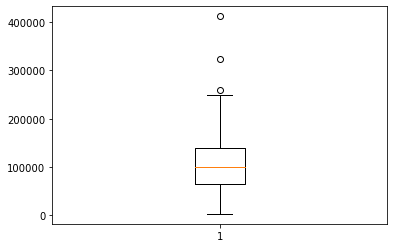

In [156]:
plt.boxplot(x=data_top4['salary_in_usd'])

Большинство данных лежит в пределах "усов". Однако, есть только три значения, которые выбиваются за "усы". Рассчитаем интерквартильный размах и определим верхнюю границу, чтобы понять, какие 3 значения нам лучше не учитывать. Используем функцию из библиотеки numpy для поиска 25 и 75 персентиля.

In [157]:
# data_top4['salary_in_usd'].describe()
irt = np.percentile(data_top4['salary_in_usd'], 75) - np.percentile(data_top4['salary_in_usd'], 25)

Исходя из боксплота видим, что ниже "усов" у нас нет выбросов, следовательно, можно найти только верхнюю границу: 75 персентиль + 1.5 межквартильного размаха.

In [158]:
a = np.percentile(data_top4['salary_in_usd'], 75) + 1.5 * irt
a

254150.0

Определили верхнюю границу. Теперь рассмотрим приведенные три значения.

In [159]:
data_top4[data_top4['salary_in_usd'] > 254150]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
63,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
416,2022,SE,FT,Data Scientist,260000,USD,260000,US,100,US,M
482,2022,EX,FT,Data Engineer,324000,USD,324000,US,100,US,M


Видя информацию по этим "выбросам" или точнее даже "уникумам", "счастливчикам", можно понять, почему это произошло. 
Что касается первых 2х - это датасаентисты, сеньёры, на полной удаленке, Американская компания. 

1)Первому датасаентисту в 2020-ом году повезло получить оклад в 412к долларов и устроиться в компанию, где больше 250 человек. 

2)А второму повезло меньше: в 2022-ом году оклад у него был в 1,5 раза меньше, чем у первого. Компания была меньше (от 50 до 250 сотрудников). 

3)Третий: это датаинженер, работавший в 2022 году. Он скорее всего сильный профессионал, который работал на удаленке в США, в компании от 50-250 человек.
Таким образом, это действительно уникумы и их можно исключить из датасета, который будем далее исследовать.

In [160]:
data_top4 = data_top4[data_top4['salary_in_usd'] <= 254150]

Далее создадим частотную таблицу зависимости от года по нашим Топ4, используя комбинацию методов groupby и value_counts. С помощью метода unstack немного "переиндексируем" нашу таблицу, чтобы можно было найти пересечение количества нужной роли и года. А затем построим гистограмму с помощью plot(kind='bar').

job_title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer
work_year,,,,
2020,7,11,20,5
2021,17,32,45,18
2022,73,88,76,18


<AxesSubplot:xlabel='work_year'>

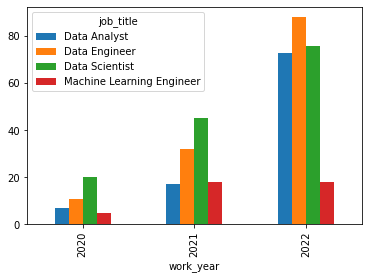

In [161]:
data_top4_sorted = data_top4.groupby('work_year')['job_title'].value_counts().unstack()
display(data_top4_sorted)

data_top4_sorted.plot(kind='bar')

На данной столбчатой диаграмме показано, как увеличилось количество предложений по каждой из выбранных ролей. В 2020 году общее число по ТОП-4 ролям не превышало в сумме 44 позиций, а в 2022 году, появились 3 явных лидера, по каждому из которых было по 70+ предложений. И если лидером в 2020 и 2021 годах была роль Data Scientist, то в 2022 году первенство, с достатчно хорошим отрывом, взяла роль Data Engineer.

Дополнительно рассчитаем, во сколько раз увеличилось количество предложений по ролям из ТОП 4 в 2022 году по сравнению с 2020 годом.

In [162]:
# Добавим новыю колонку - сумма всех ролей топ4 в указанный год
data_top4_sorted['summ'] = data_top4_sorted[['Data Scientist','Data Engineer',
                                            'Data Analyst', 'Machine Learning Engineer']].sum(axis=1)
display(data_top4_sorted)
# рассчитаем все показатели: во сколько раз увеличилось количество предложений по DA, DS, DE, ML и далее округлим
da = round(data_top4_sorted.iloc[2]['Data Analyst'] / data_top4_sorted.iloc[0]['Data Analyst'])
de = round(data_top4_sorted.iloc[2]['Data Engineer'] / data_top4_sorted.iloc[0]['Data Engineer'])
ds = round(data_top4_sorted.iloc[2]['Data Scientist'] / data_top4_sorted.iloc[0]['Data Scientist'])
ml = round(data_top4_sorted.iloc[2]['Machine Learning Engineer'] / data_top4_sorted.iloc[0]
           ['Machine Learning Engineer'])
sm = round(data_top4_sorted.iloc[2]['summ'] / data_top4_sorted.iloc[0]['summ'])
display(da, de, ds, ml, sm)

job_title,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,summ
work_year,,,,,
2020,7,11,20,5,43
2021,17,32,45,18,112
2022,73,88,76,18,255


10

8

4

4

6

Из полученной гистограммы можно увидеть несколько интересных моментов:
1. Мы видим существенное увеличение количества специалистов в 2022 году по сравнению с 2020 годом, абсолютно по всем ролям из ТОП-4:
    1. Общее количество вакансий из ТОП-4 увеличилось примерно в 6 раз;
    2. Количество предложений по дата аналитикам увеличилось примерно в 10 раз;
    3. Количество предложений по дата инженерам увеличилось примерно в 8 раз;
    4. Количество предложений по дата саентистам увеличилось примерно в 4 раза;
    5. Количество предложений по ML-инженерам увеличилось примерно в 4 раза.
2. Роль дата саентистов в 2022 уступила свое первое место дата инженерам.
3. Потребность в специалистах по машинному обучению была одинаковой в 2021 и 2022 годах.

Посчитаем, какой процент занимают специалисты из ТОП-4 из общего количества вакансий.

In [163]:
data_top4.shape[0] / data.shape[0] * 100

67.54530477759472

68% из всех имеющихся в датасете ролей составляют специалисты из раннего определенного ТОП 4. Предположим, исходя из показателей ТОП-4 за 2022 год, сфера ДС стала сильно масштабироваться, и из отдельных ключевых навыков датасаентиста стали появляться новые роли. То есть оставшиеся 32% ролей должны прийтись на 2022 год. Проверим это.

In [164]:
data_no_top4 = data[(data['job_title'] != 'Data Scientist') &
                 (data['job_title'] != 'Data Engineer') &
                (data['job_title'] != 'Data Analyst') &
                (data['job_title'] != 'Machine Learning Engineer')]
data_no_top4.groupby('work_year')['job_title'].count()

work_year
2020     28
2021    105
2022     61
Name: job_title, dtype: int64

Действительно, данное предположение практически верно. Видимо, в 2021 году преобладал тренд на дробление компетенций на новые роли, а уже в 2022 выделились "Main (основные) роли" в виде DA и DI.

## Исследование 2

### Как изменялась зарплата в течение трех лет у ДС

В данном датасете есть специальнная колонка с перерасчетом зарплаты в долларах по принципу: курс валюты, разделенный на средний курс доллара США за соответствующий год через fxdata.foorilla.com. Воспользуемся этой колонкой, чтобы определить среднее значение, медианное, моду по зарплате в долларах для данной роли. Также добавим учет опыта работы данного специалиста.

Создадим отдельный датафрейм и сгруппируем данные по опыту работы. Также найдем среднее, медианное, моду и СКО для зарплат для каждого значения опыта работы.

mean  median    std    moda
work_year experience_level                               
2020      EN                 54983   50294  28088   51321
          MI                 71256   62726  35724   79833
          SE                 93222   91237  25843   68428
2021      EN                 53622   49646  34540  100000
          MI                 72145   73000  47342   90734
          SE                 91782   87738  48653   53192
2022      EN                 59508   52396  33529   18442
          MI                 99574   95807  47753  130000
          SE                157900  146000  39937  140000

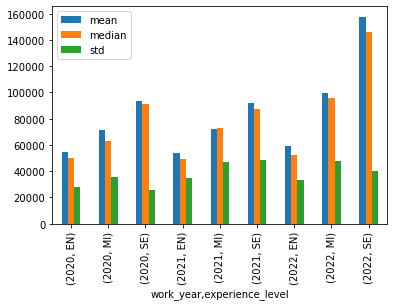

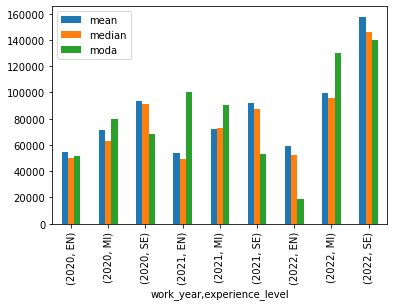

In [165]:
# Создаем датафрейм только с дата саентистами
data_ds = data_top4[data_top4['job_title'] == 'Data Scientist']
# создаем в отдельную функцию моду для дальнейших расчетов
moda = lambda x: x.value_counts().index[0]
# группируем наш датасет по годам 20-21-22 и по опыту работы и считаем среднее, медиану, СКО и моду для зп в долларах
data_ds = data_ds.groupby(['work_year', 'experience_level'])['salary_in_usd'].agg(
                                                            ['mean', 'median', 'std', moda]
                                                                              )
# округлим до целого полученные значения для небольшого удобства
# для этого сначала округлили значения в серии, а потом методом astype преобразовали все наши значения серии в тип целого
# data_ds.round()
data_ds = data_ds.apply(lambda x: round(x)).astype('int')

# переименуем столбец с функцией моды <lambda_0> на "moda"
data_ds.rename(columns = {'<lambda_0>' : 'moda'}, inplace = True)
# построим две отдельные столбчатые диаграммы, чтобы удобнее было сравнивать
data_ds.plot(y=['mean', 'median', 'std'], kind='bar')
data_ds.plot(y=['mean', 'median', 'moda'], kind='bar')
display(data_ds)

Полученная гистограмма позволяет сделать следующие выводы:
1. В целом, за последние три года для датасаентистов разного опыта медианная зарплата всегда относительно близка к среднему значению (кроме 2021 года для мидлов). Скорее всего, это классический сценарий, при котором средняя немного выше, чем медианная. Но и небольшая разница говорит о том, что в зарплатах данного специалиста не было очень выгодного предложения или наоборот очень невыгодного. То есть, распределение по зарплатам было практически симметричным без явных скосов.
2. В 2021 году для мидлов зарплатный рынок вероятно был немного недооценен, так как медианное значение слегка превышает среднее. Такое явление говорит о том, что в 2021 году на позиции мидл дс могли встречаться достаточно низкие зарплатные предложения. СКО, который выше половины среднего значения, также это подтверждает.
3. В 2022 году по сравнению с 2020 и 2021 годами можно увидеть стабилизирование рынка, когда идёт пропорциональное увеличение зарплаты в зависимости от опыта специалиста. При этом показатели среднего, медианы и СКО не не свидетельствуют о какой либо аномалии. Даже напротив, СКО для сеньеров в 2022 году является довольно небольшим, по сравнению с предыдущим годом. Это означает, что денежная оценка специалиста такого уровня приобрела более постоянный характер, и вся "зарплатная вилка" сосредоточена рядом относительно среднего.
4. Если смотреть на другую гистограмму, где было убрано среднее, и добавлена мода, то можно сделать вывод, что 2022 год для сеньеров был действительно благоприятным. Самая "часто встречающаяся зп" буквально чуть-чуть уступает медиане и среднему.
5. А в 2022 году для джунов, наоборот, "оценка их компетенций" была чаще всего достаточно низкой.

## Исследование 3

### Исследуем, есть ли зависимость между средней зарплатой ДА специалиста и опытом работы, типом занятости, страной проживания, страной компании и размерами компании.

In [166]:
# - work_year - год выплаты зарплаты;
# - experience_level - уровень опыта работы в течение года, где EN- Начальный уровень / MI- Мидл / SE- Сеньёр / EX- Профи;
# - employment_type - Тип занятости на роль, где: PT- Неполный рабочий день / FT- Полный рабочий день / CT- Контракт / FL- Фриланс;
# - job_title	- Точное название роли;
# - salary - Величина зарплаты (евро или доллар);
# - salary_currency - Валюта выплачиваемой заработной платы;
# - salaryinusd - Заработная плата в долларах США (курс валюты, разделенный на средний курс доллара США за соответствующий год через fxdata.foorilla.com;
# - employee_residence - Основная страна проживания сотрудника в течение рабочего года в виде кода страны ISO 3166;
# - remote_ratio - Общий объем удаленной работы, где: 0- Нет удаленной работы (или менее 20%), 50- Частично удаленная работа, 100- Полностью удаленная работа (или более 80%);
# - company_location - Страна главного офиса или филиала работодателя тоже в виде кода страны ISO 3166;
# - company_size - Среднее количество людей, работавших в компании в течение года: S- менее 50 сотрудников, M- от 50 до 250 сотрудников, L- более 250 сотрудников


Создадим отдельный датасет для дата аналитиков.

In [167]:
data_da = data_top4[data_top4['job_title'] == 'Data Analyst']

Сгруппируем данные по году выплаты зп, опыту работ. Найдем среднюю зарплату в долларах. Затем сделаем "подиндекс" в виде опыта работы в качестве отдельного столбца, с помощью метода unstack и построим столбчатую диаграмму. Добавим аргумент и значение "stacked=True", чтобы получить гистограмму не с отдельными столбцами по каждому году для каждого вида опыта работы, а в виде одного столбца, который отражает "соотношение" величин.

<AxesSubplot:xlabel='work_year'>

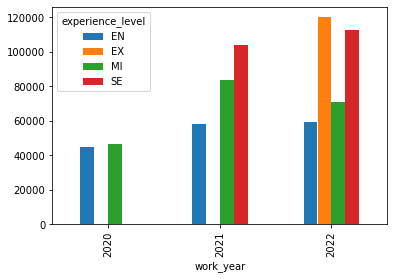

In [168]:
data_da.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack().plot(kind='bar')

1. С каждым годом, начиная с 2020, появлялся "новый уровень" по опыту. В 2020 году началось все с джуна и мидла, в 2021 году уже появился сеньер. А уже в 2022 году добавились в общий пул и эксперты.
2. Средняя зп джунов за 3 года сильно не изменилась, зп мидлов немного колеблется. Зп сеньеров немного выросла в 2022 году по сравнению с 2021 годом. Средняя зп "экспертов" занимает первое место.

Рассмотрим то же самое, но в зависимости от типа работы.

<AxesSubplot:xlabel='work_year'>

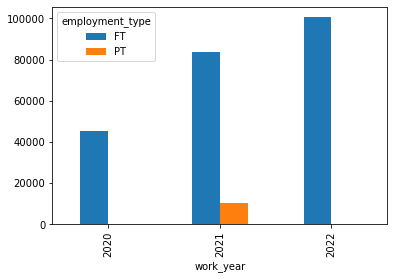

In [169]:
data_da.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().unstack().plot(kind='bar')

Практически 98% случаев тип занятости - полный рабочий день, зп на протяжении всех 3х лет растет. В 2021 году появились предложения по неполному рабочему дню, но и средние зарплаты при этом были достаточно низки. Что объяснятеся тем, что данные виды работы вряд ли могут быть объективно сопоставимы между собой.

Теперь рассмотрим страны проживания дата аналитиков за 3 года.

In [170]:
data_da['employee_residence'].value_counts()

US    70
CA     9
GB     5
ES     3
GR     3
FR     2
PK     1
NG     1
IN     1
BG     1
DE     1
Name: employee_residence, dtype: int64

Лидирует США, затем идут Канада, Англия, Испания и так далее. Хочется выделить две группы для того, чтобы выделить зависимость средней зп от стран проживания сотрудников. И отдельно выделить США, группу из 2,3,4 мест и остальных.

In [171]:
usa_max = data_da[data_da['employee_residence'] == 'US']['salary_in_usd'].max()
usa_mean = data_da[data_da['employee_residence'] == 'US']['salary_in_usd'].mean()

top2_4_max = data_da[(data_da['employee_residence'] == 'CA') |
                    (data_da['employee_residence'] == 'GB') |
                    (data_da['employee_residence'] == 'ES') |
                    (data_da['employee_residence'] == 'GR')]['salary_in_usd'].max()
top2_4_mean = data_da[(data_da['employee_residence'] == 'CA') |
                    (data_da['employee_residence'] == 'GB') |
                    (data_da['employee_residence'] == 'ES') |
                    (data_da['employee_residence'] == 'GR')]['salary_in_usd'].mean()

cellar_max = data_da[(data_da['employee_residence'] != 'CA') |
                    (data_da['employee_residence'] != 'GB') |
                    (data_da['employee_residence'] != 'ES') |
                    (data_da['employee_residence'] != 'GR') |
                    (data_da['employee_residence'] != 'US')]['salary_in_usd'].max()
cellar_mean = data_da[(data_da['employee_residence'] != 'CA') |
                    (data_da['employee_residence'] != 'GB') |
                    (data_da['employee_residence'] != 'ES') |
                    (data_da['employee_residence'] != 'GR') |
                    (data_da['employee_residence'] != 'US')]['salary_in_usd'].mean()

display(usa_max, top2_4_max, cellar_max)
display(usa_mean, top2_4_mean, cellar_mean)

200000

130000

200000

108069.5

58599.9

92893.06185567011

Нельзя сделать вывод, что специалистов из других стран ценят меньше, чем из США. MAX по зп в США одинаковый со странами "меньшинства". Средняя зп тоже практически у них одинакова. При этом, специалистов из стран ТОП 2-4 меньше ценят в денежном эквиваленте.

Теперь посмотрим на зависимость между средней зп и местонахождением головного офиса компании.

<AxesSubplot:xlabel='work_year'>

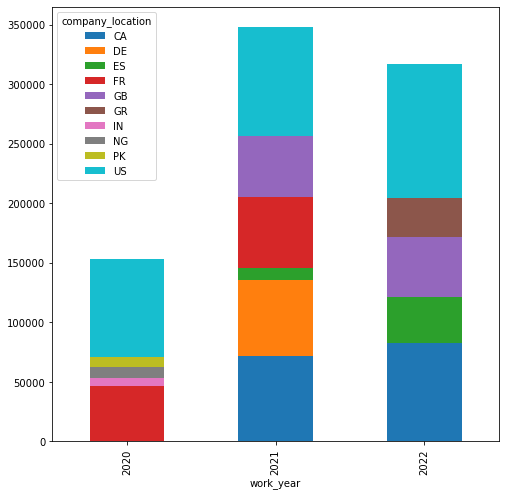

In [182]:
data_da.groupby(['work_year', 'company_location'])['salary_in_usd'].mean().unstack().plot(kind='bar', stacked=True, figsize=(8,8))

Здесь можно отметить, что первыми, кто начали анализировать данные, были компании с головным офисом в США и в Франции. В 2021 году к ним присоединились канадцы, немцы, англичане и другие. Тем не менее, в 2022 остались США, Канада, Великобритания, Испания и Греция.

Теперь рассмотрим зависимость между средней зп и размером компаний.

<AxesSubplot:xlabel='work_year'>

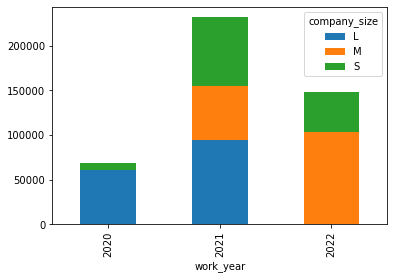

In [173]:
data_da.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack().plot(kind='bar', stacked=True)

Анализом данных первыми начали заниматься крупные компании, у которых было что анализировать, а также мелкие компании с большими амбициями. Затем появились средние компании. Что и ожидаемо, средняя ЗП у крупных компаний была выше, чем у кого-либо, но второе место заняли маленькие компании. А вот в 2022 году крупные компании совсем ушли с данной сферы, максимально оставив аналитику средним и мелким компаниям на аутсорс.

## Исследование 4

### Проделаем ту же работу, что и в исследовании 3, только уже для дата инженеров.

Создадим отдельный датасет для дата инженеров.

In [174]:
data_di = data_top4[data_top4['job_title'] == 'Data Engineer']

Сгруппируем данные по году выплаты зп, опыту работы и найдем среднюю зарплату в долларах. Затем сделаем "подиндекс" в виде опыта работы в качестве отдельного столбца, с помощью метода unstack и построим столбчатую диаграмму. Добавим аргумент и значение "stacked=True". Это необходимо, чтобы получить гистограмму не с отдельными столбцами по каждому году для каждого вида опыта работы, а в виде одного столбца, который отражает "соотношение" величин.

<AxesSubplot:xlabel='work_year'>

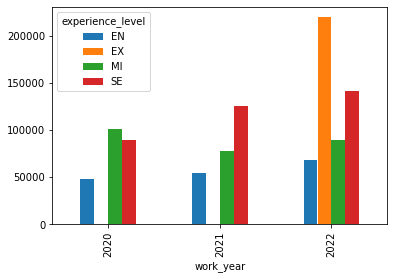

In [175]:
data_di.groupby(['work_year', 'experience_level'])['salary_in_usd'].mean().unstack().plot(kind='bar')

Роль дата инженеров в 2020 году была развита чуть больше, чем роль аналитиков. Но при этом, средние зарплаты мидлов и сеньеров не очень то и различаются. В 2021 году ситуация становится чуть яснее и логичнее, сеньеров ценят выше, чем мидлов и джунов. А в 2022 году появляется лидер по средней зп - эксперты.

Рассмотрим, зависимость оплаты труда от типа работы.

<AxesSubplot:xlabel='work_year'>

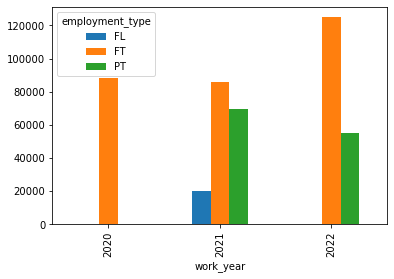

In [176]:
data_di.groupby(['work_year', 'employment_type'])['salary_in_usd'].mean().unstack().plot(kind='bar')

В целом, здесь такая же ситуация, как у аналитиков. Преобладает полная занятость, но в 2021 году средняя зп тех, кто работает по частичной занятости, почти сравнялась со средней зп тех, кто работает фултайм. Также произошел небольшой рост у фрилансеров.

Теперь рассмотрим страны проживания дата инженеров за 3 года.

In [177]:
data_di['employee_residence'].value_counts()

US    81
GB    18
ES     5
GR     5
DE     2
TR     2
FR     2
PK     2
IN     2
NL     2
RO     2
IR     1
HK     1
IT     1
JP     1
MT     1
AT     1
MX     1
PL     1
Name: employee_residence, dtype: int64

Здесь также лидирует Америка. И на втором месте, с относительно неплохим отрывом от остальных, идет Великобритания.

Рассмотрим с помощью круговой диаграммы на соотношение средней зп и страны кандидата за 2022 год.

<AxesSubplot:title={'center':'Соотношение по средней зарплате в зависимости от проживания кандидата в 2022 году'}, ylabel='salary_in_usd'>

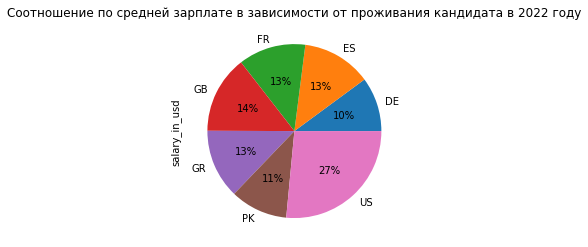

In [181]:
# Выделили данные за 2022 год, сгруппировали по стране проживания, и считаем среднее по зп в долларах
data_di[data_di['work_year'] == 2022].groupby('employee_residence')['salary_in_usd'].mean().plot(
                kind='pie', # строим круговую диаграмму
                autopct='%1.0f%%', # устанавливаем отображение в процентах
                title='Соотношение по средней зарплате в зависимости от проживания кандидата в 2022 году') # задаем заголовок

В 2022 ничего не изменилось. США- лидер даже по средней зарплате, второе место у Великобритании; далее идут остальные страны.

Теперь посмотрим на зависимость между средней зп и местонахождением головного офиса компании. Сначала выделим ТОП 5 стран по количеству предложений. А затем для них построим стоолбчатую диаграмму, как и для аналитиков.

In [187]:
data_di['company_location'].value_counts().head(5)

US    84
GB    20
GR     5
DE     4
ES     4
Name: company_location, dtype: int64

<AxesSubplot:xlabel='work_year'>

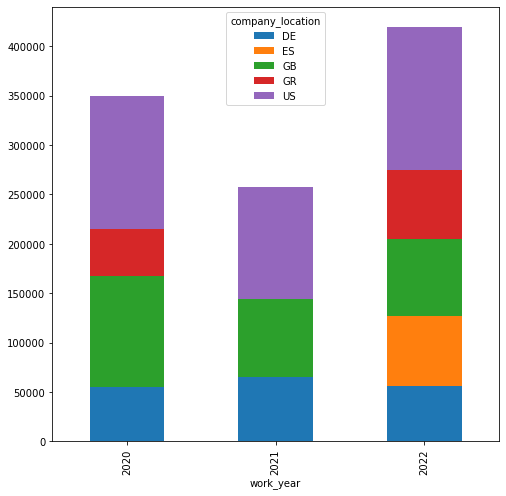

In [194]:
data_di2 = data_di[(data_di['company_location'] == 'US') |
       (data_di['company_location'] == 'GB') |
       (data_di['company_location'] == 'GR') |
       (data_di['company_location'] == 'DE') |
       (data_di['company_location'] == 'ES')]
data_di2.groupby(['work_year', 'company_location'])['salary_in_usd'].mean().unstack().plot(
    kind='bar', stacked=True, figsize=(8,8))

Как и в частотной таблице, здесь тоже наблюдается, что США являются явным лидером по средней величине зп в каждый год с 2020-2022. Однако, их догоняет Великобритания.

Проанализируем зависимость между средней зп и размером компаний.

<AxesSubplot:xlabel='work_year'>

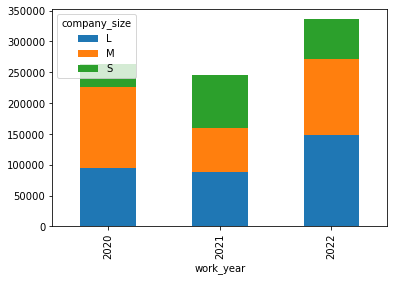

In [195]:
data_di.groupby(['work_year', 'company_size'])['salary_in_usd'].mean().unstack().plot(kind='bar', stacked=True)

Во всех годах датасета, предложения поступали от компаний разного уровня: как от маленьких, средних, так и от больших. Можно отметить, что средняя зарплата крупных компаний увеличилась; средняя зарплата средних и маленьких компаний тоже. При этом, они не выше, чем у больших компаний.

## Общие выводы

1. В сфере датасаенс лидируют 3 следующие специализации: аналитики, инженеры и датасаентисты. Так, например, в 2022 году по сравнению с 2020, количество вакансий по этим ролям увеличилось в 4 раза. Но больше всего стало предложений для дата аналитиков (уаеличение почти в 10 раз) и для дата инженеров (почти в 8 раз). Это произошло всего за 2 года.

2. Сфера датасаенс действительно набирает обороты по количеству предложений, по масштабированию сферы и по увеличению средней заработной платы. В целом, рынок за эти 3 года колебался в плане зарплат, возможно из-за того, что это достаточно молодая/новая профессия + влияние COVID. Рынок датасаентистов в 2022 году стал более нестабильным. Зарплаты для мидлов и сеньеров достаточно выросли по сравнению с предыдущими годами, а вот зарплата для джунов является крайне низкой, даже если сравнивать ее с предыдущими годами.

3. Исходя из изученного датасета, можно предположить, что роль дата аналитиков действительно является относительно новой. 2 года назад практически не было предложений по данной вакансии, только если на позицию джуна или мидла. Можно предположить, что в 2020 году компании вряд ли делали что-то масштабное. Скорее всего, в этот период рынок "даты" столкнулся с большим количеством данных и начал быстро реагировать на это. Но уже на следующий год появляются предложения уже по всем трём уровням по опыту работы, а ещё через год даже возникает уровень "эксперт". Размеры компаний, которые занимаются анализом данных, за 3 года тоже изменились. Первыми столкнулись с этой сферой крупные компании, у которых был достаточный объём данных. Но к 2022 году в аналитике остались уже только маленькие и средние компании. Возможно, это связано с тем, что выгоднее отдавать задачи на аутсорс и делить на сегменты, чем набирать отдельную команду/отдел.

4. С датаинженерами прослеживается примерно такая же ситуация. За 2 года данная роль тоже набрала обороты в зарплатах и разнообразии предложений для разного уровня потенциального специалиста. Но однозначно сказать, что компании также предпочитают нанимать датаинжнеров только в маленькие и средние компании - явно нельзя. Скорее наоборот, зарплаты в крупных компаниях для данных специалистов явно выросли. Это говорит о том, что сбор, фильтрацию данных и т.п. крупные компании уже просто так не могут доверить более мелким компаниям, а хотят держать все при себе.